In [16]:
!pip install -U scikit-learn

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wget
import os
import cv2
from random import randint

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split



In [18]:
!pip install wget unzip

In [19]:
# !wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/gemstones.zip"
# !unzip -qo gemstones.zip

import requests  
import zipfile

url = "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/gemstones.zip"

# Send a GET request to download the file
response = requests.get(url, stream=True)

# Check for successful download (status code 200)
if response.status_code == 200:
  # Set the filename (replace "gemstones.zip" if necessary)
  filename = "gemstones.zip"

  # Open the file in binary write mode
  with open(filename, "wb") as f:
    for chunk in response.iter_content(1024):
      f.write(chunk)
  print(f"File downloaded successfully: {filename}")
else:
  print(f"Error downloading file: {response.status_code}")
# Extract the downloaded ZIP file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall()

print("File extracted successfully")

File downloaded successfully: gemstones.zip
File extracted successfully


In [20]:
directory = 'gemstones/train/'

In [21]:
#printing all the gemstone categories present in our dataset
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['Alexandrite', 'Ametrine', 'Andalusite', 'Andradite', 'Aventurine Green', 'Aventurine Yellow', 'Blue Lace Agate', 'Carnelian', 'Cats Eye', 'Chalcedony', 'Chrome Diopside', 'Chrysoberyl', 'Chrysoprase', 'Danburite', 'Diamond', 'Dumortierite', 'Emerald', 'Hessonite', 'Iolite', 'Lapis Lazuli', 'Larimar', 'Morganite', 'Onyx Red', 'Peridot', 'Prehnite', 'Quartz Beer', 'Quartz Rose', 'Quartz Smoky', 'Rhodochrosite', 'Ruby', 'Sapphire Pink', 'Sapphire Yellow', 'Serpentine', 'Spinel', 'Spodumene', 'Sunstone', 'Tigers Eye', 'Topaz', 'Variscite', 'Zoisite']
40


In [22]:
gems_map = dict(zip(Name, [t for t in range(len(Name))]))
print(gems_map)
r_gems_map=dict(zip([t for t in range(len(Name))],Name))

{'Alexandrite': 0, 'Ametrine': 1, 'Andalusite': 2, 'Andradite': 3, 'Aventurine Green': 4, 'Aventurine Yellow': 5, 'Blue Lace Agate': 6, 'Carnelian': 7, 'Cats Eye': 8, 'Chalcedony': 9, 'Chrome Diopside': 10, 'Chrysoberyl': 11, 'Chrysoprase': 12, 'Danburite': 13, 'Diamond': 14, 'Dumortierite': 15, 'Emerald': 16, 'Hessonite': 17, 'Iolite': 18, 'Lapis Lazuli': 19, 'Larimar': 20, 'Morganite': 21, 'Onyx Red': 22, 'Peridot': 23, 'Prehnite': 24, 'Quartz Beer': 25, 'Quartz Rose': 26, 'Quartz Smoky': 27, 'Rhodochrosite': 28, 'Ruby': 29, 'Sapphire Pink': 30, 'Sapphire Yellow': 31, 'Serpentine': 32, 'Spinel': 33, 'Spodumene': 34, 'Sunstone': 35, 'Tigers Eye': 36, 'Topaz': 37, 'Variscite': 38, 'Zoisite': 39}


In [23]:
img_w, img_h = 100, 100

In [24]:
#function which reads images and class names
def read_images():
    Images, Labels = [], []
    for root, dirs, files in os.walk('gemstones/train/'):
        f = os.path.basename(root)
        for file in files:
            Labels.append(f)
            try:
                image = cv2.imread(root+'/'+file)              # read the image (OpenCV)
                image = cv2.resize(image,(int(img_w), int(img_h)))       # resize the image (images are different sizes)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts an image from BGR color space to RGB
                Images.append(image)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    return (Images,Labels)

In [25]:
#function which converts string labels to numbers
def get_class_index(Labels):
    for i, n in enumerate(Labels):
        for j, k in enumerate(Name):
            if n == k:
                Labels[i] = j
    Labels = np.array(Labels)
    return Labels

In [26]:

# Read images and labels from the training set.

Train_Imgs, Train_Lbls = read_images()
Train_Lbls = get_class_index(Train_Lbls)
print('Shape of train images: {}'.format(Train_Imgs.shape))
print('Shape of train labels: {}'.format(Train_Lbls.shape))



Shape of train images: (1303, 100, 100, 3)
Shape of train labels: (1303,)


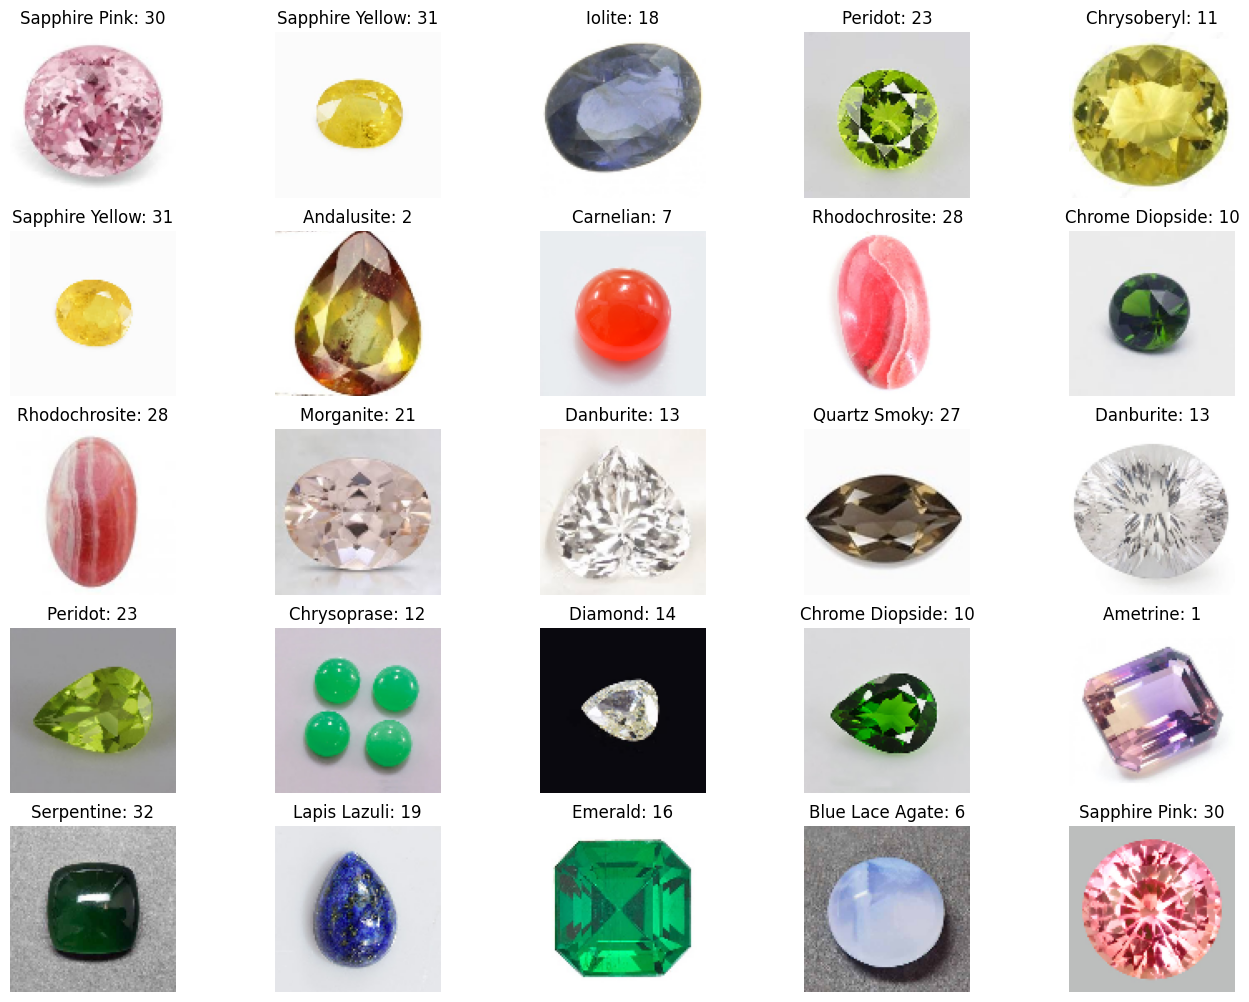

In [27]:
dim = 5

f,ax = plt.subplots(dim,dim)
f.subplots_adjust(0,0,2,2)
for i in range(0,dim):
    for j in range(0,dim):
        rnd_number = randint(0,len(Train_Imgs))
        cl = Train_Lbls[rnd_number]
        ax[i,j].imshow(Train_Imgs[rnd_number])
        ax[i,j].set_title(Name[cl]+': ' + str(cl))
        ax[i,j].axis('off')

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Train_Imgs, Train_Lbls, shuffle = True, test_size = 0.2, random_state = 42)
print('Shape of X_train: {}, y_train: {} '.format(X_train.shape, y_train.shape))
print('Shape of X_val: {}, y_val: {} '.format(X_val.shape, y_val.shape))

Shape of X_train: (1042, 100, 100, 3), y_train: (1042,) 
Shape of X_val: (261, 100, 100, 3), y_val: (261,) 


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Activation,BatchNormalization, AveragePooling2D
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model

In [30]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(100,100,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(len(gems_map)))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0

In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
train_datagen = ImageDataGenerator(vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)

val_datagen = ImageDataGenerator()

In [33]:
batch_size = 32

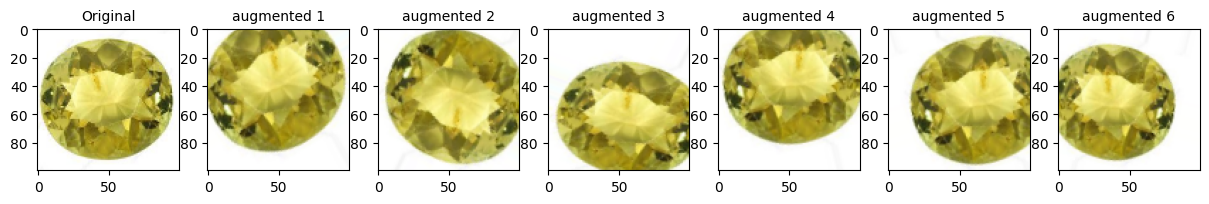

In [34]:
n = randint(0,len(X_train))
samples = np.expand_dims(X_train[n], 0)
it = train_datagen.flow(samples, batch_size=batch_size)
cols = 7

fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(15, 10))
ax[0].imshow(X_train[n], cmap='gray')
ax[0].set_title('Original', fontsize=10)

for i in range(1,cols):
    batch = next(it)    # Use next(it) to get the next batch
    image = batch[0].astype('uint32') # convert to unsigned int for viewing
    ax[i].set_title('augmented {}'.format(i), fontsize=10)
    ax[i].imshow(image, cmap='gray')

In [35]:
train_gen = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_gen = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [36]:
EPOCHS = 80
iter_per_epoch = len(X_train) // batch_size
val_per_epoch = len(X_val) // batch_size

In [37]:
m = model.fit(
       train_gen,
       steps_per_epoch= iter_per_epoch,
       epochs=EPOCHS,
       validation_data = val_gen,
       validation_steps = val_per_epoch,
       verbose = 1
       )

Epoch 1/80
32/32 [==============================] - 39s 892ms/step - loss: 4.0100 - accuracy: 0.0525 - val_loss: 3.4021 - val_accuracy: 0.0586
Epoch 2/80
32/32 [==============================] - 24s 741ms/step - loss: 3.1533 - accuracy: 0.1040 - val_loss: 2.8921 - val_accuracy: 0.1133
Epoch 3/80
32/32 [==============================] - 25s 753ms/step - loss: 2.7077 - accuracy: 0.1762 - val_loss: 2.3941 - val_accuracy: 0.2578
Epoch 4/80
32/32 [==============================] - 24s 745ms/step - loss: 2.3753 - accuracy: 0.2733 - val_loss: 1.9148 - val_accuracy: 0.3594
Epoch 5/80
32/32 [==============================] - 23s 720ms/step - loss: 2.1129 - accuracy: 0.3396 - val_loss: 1.9179 - val_accuracy: 0.3203
Epoch 6/80
32/32 [==============================] - 23s 725ms/step - loss: 1.7533 - accuracy: 0.4089 - val_loss: 1.8162 - val_accuracy: 0.3906
Epoch 7/80
32/32 [==============================] - 24s 729ms/step - loss: 1.7445 - accuracy: 0.4228 - val_loss: 1.5522 - val_accuracy: 0.5273

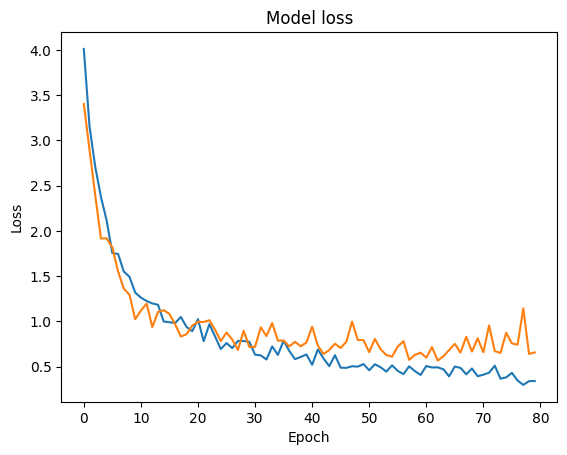

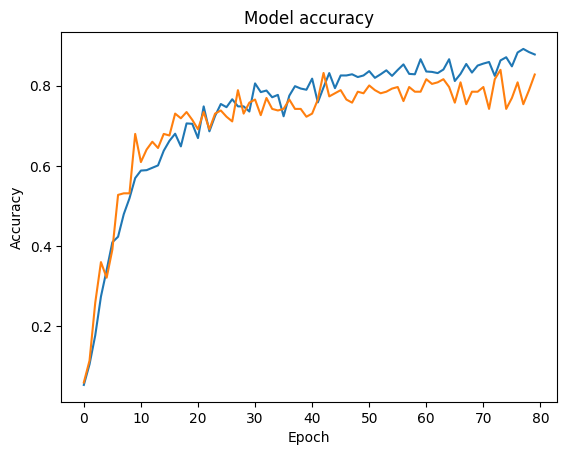

In [38]:

# Plot accuracy and loss graphs to evaluate the performance of our model.

plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss')
plt.show()

plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model accuracy')
plt.show()



In [39]:

# Read the images and labels from the test set.

def read_imagest():
    Images, Labels = [], []
    for root, dirs, files in os.walk('gemstones/test/'):
        f = os.path.basename(root)
        for file in files:
            Labels.append(f)
            try:
                image = cv2.imread(root+'/'+file)              # read the image (OpenCV)
                image = cv2.resize(image,(int(img_w), int(img_h)))       # resize the image (images are different sizes)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts an image from BGR color space to RGB
                Images.append(image)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    return (Images,Labels)



In [40]:
Test_Imgs, Test_Lbls = read_imagest()
Test_Lbls = get_class_index(Test_Lbls)

1/1 [==============================] - 0s 42ms/step


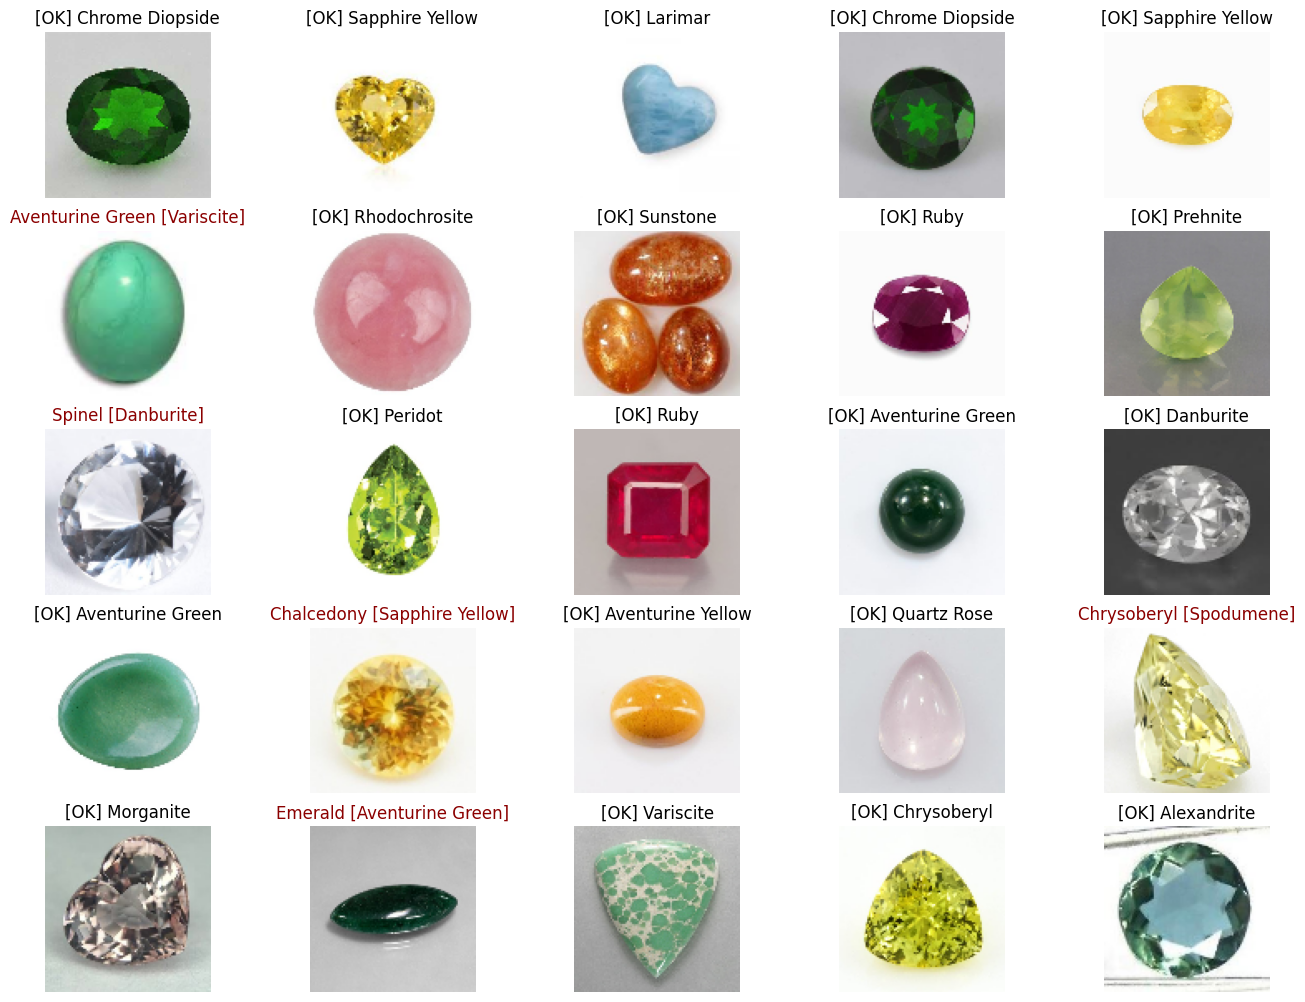

In [41]:

# Make predictions on random images from the test set.

f,ax = plt.subplots(5,5)
f.subplots_adjust(0,0,2,2)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Test_Imgs))
        pred_image = np.array([Test_Imgs[rnd_number]])
        # Use `predict` and `argmax` to get the predicted class
        pred_class = np.argmax(model.predict(pred_image), axis=-1)[0]
        pred_prob = model.predict(pred_image).reshape(40)
        act =Name[Test_Lbls[rnd_number]]
        ax[i,j].imshow(Test_Imgs[rnd_number])
        ax[i,j].imshow(pred_image[0])
        if(Name[pred_class] != Name[Test_Lbls[rnd_number]]):
            t = '{} [{}]'.format(Name[pred_class], Name[Test_Lbls[rnd_number]])
            ax[i,j].set_title(t, fontdict={'color': 'darkred'})
        else:
            t = '[OK] {}'.format(Name[pred_class])
            ax[i,j].set_title(t)
        ax[i,j].axis('off')



In [42]:
import os

# Create the directory if it doesn't exist
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

model.save('saved_models/gemstone.keras')  # Save with .keras extension